# Food Access Analysis 

## Setup and Data Review

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Vis style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the cleaned data
path = r'\Data\FD3.csv'
FD = pd.read_csv(path)
# Display basic info about the dataset
print("Dataset Info:")
print(FD.info())

# Preview the first few rows
print("\nFirst 5 Rows of Dataset:")
print(FD.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tract_ID                    72531 non-null  int64  
 1   fipscode                    72531 non-null  int64  
 2   State                       72531 non-null  object 
 3   County                      72531 non-null  object 
 4   Urban_Status                72531 non-null  object 
 5   LowFoodAccess               72531 non-null  object 
 6   Total_Population            72531 non-null  int64  
 7   LowAccess_Pop               72531 non-null  float64
 8   LowIncome_Pop               72531 non-null  float64
 9   LowIncome&_LowAccess_Pop    72531 non-null  float64
 10  NoVehicle_HHs               72531 non-null  float64
 11  SNAP_HHs                    72531 non-null  float64
 12  Poverty_Rate                72531 non-null  float64
 13  Median_Income    

In [107]:
# Preview the first few rows
print("\nFirst 5 Rows of Dataset:")
print(FD.head())


First 5 Rows of Dataset:
     Tract_ID  fipscode    State          County Urban_Status LowFoodAccess  \
0  1001020100      1001  Alabama  Autauga County        Urban            NO   
1  1001020200      1001  Alabama  Autauga County        Urban           YES   
2  1001020300      1001  Alabama  Autauga County        Urban            NO   
3  1001020400      1001  Alabama  Autauga County        Urban            NO   
4  1001020500      1001  Alabama  Autauga County        Urban            NO   

   Total_Population  LowAccess_Pop  LowIncome_Pop  LowIncome&_LowAccess_Pop  \
0              1912         1896.0          455.0                     461.0   
1              2170         1261.0          802.0                     604.0   
2              3373         1552.0         1306.0                     478.0   
3              4386         1363.0          922.0                     343.0   
4             10766         2643.0         2242.0                     586.0   

   ...  Poverty_Rate  Me

In [99]:
FD.columns

Index(['Tract_ID', 'fipscode', 'State', 'County', 'Urban_Status',
       'LowFoodAccess', 'Total_Population', 'LowAccess_Pop', 'LowIncome_Pop',
       'LowIncome&_LowAccess_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate',
       'premature_death', 'poor_health', 'low_birthweight', 'obesity',
       'diabetes', 'unemployment', 'child_poverty', 'income_inequality'],
      dtype='object')

In [101]:
#Drop these columns 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio', 'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate',
FD = FD[['Tract_ID', 'fipscode', 'State', 'County', 
         'Urban_Status','LowFoodAccess',
         'Total_Population', 'LowAccess_Pop', 'LowIncome_Pop',
       'LowIncome&_LowAccess_Pop',
       'NoVehicle_HHs', 'SNAP_HHs',  'Poverty_Rate', 'Median_Income',
       'premature_death', 'poor_health', 'low_birthweight', 'obesity',
       'diabetes', 'unemployment', 'child_poverty', 'income_inequality']]

### Overview of the Data to give us an idea 
Such as food access numbers , uraban vs rural. This is not good for analyis or answering question but rtahter an over view 

Urban_Status:
              LowFoodAccess
Urban_Status               
Rural                 17362
Urban                 55169


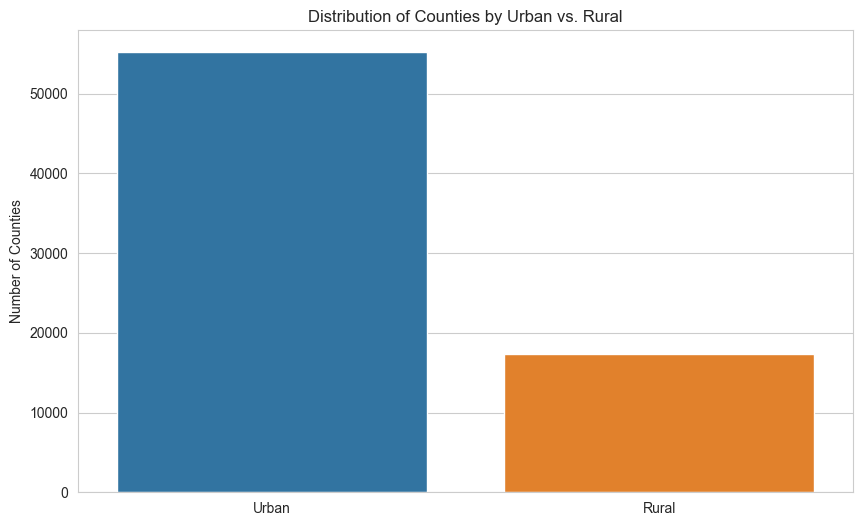

In [ ]:
# Urban vs. Rural Count

Urban_count = FD.groupby('Urban_Status')[['LowFoodAccess']].count()
print("Urban_Status Count:")
print(Urban_count)

#Counties by Urban vs. Rural
sns.countplot(data=FD, x="Urban_Status", hue="Urban_Status")
plt.title("Distribution of Counties by Urban vs. Rural")
plt.xlabel(None)
plt.ylabel("Number of Counties")
plt.show()



Food Access by Urban Status:
              LowFoodAccess
Urban_Status               
Rural                 17362
Urban                 55169


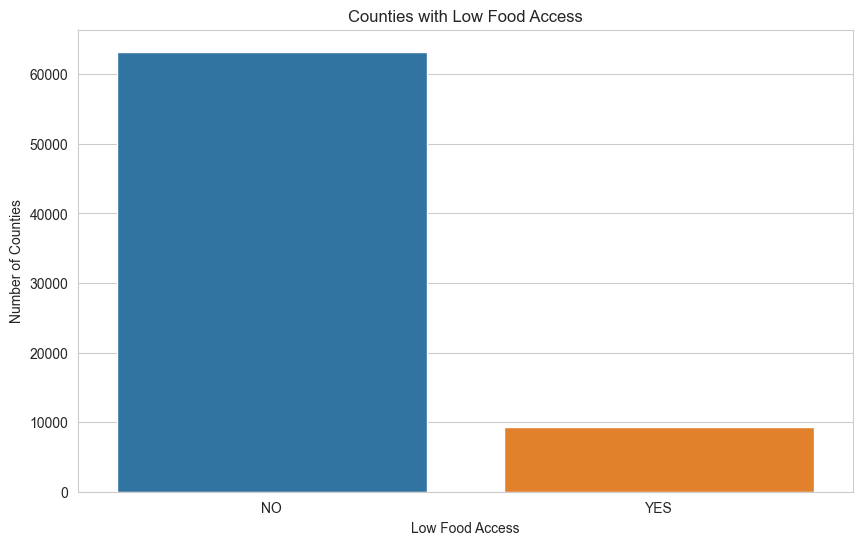

In [186]:
FoodAccess_count = FD.groupby('LowFoodAccess')[['Urban_Status']].count()
print("Food Access by Urban Status:")
print(Urban_count)
# Food Access Classification
sns.countplot(data=FD, x="LowFoodAccess", hue="LowFoodAccess")
plt.title("Counties with Low Food Access")
plt.xlabel("Low Food Access")
plt.ylabel("Number of Counties")
plt.show()


In [184]:
#2x2 table (contingency table / cross-tabulation)

Urban_contingency_table = pd.crosstab(FD["LowFoodAccess"], FD["Urban_Status"])

print("Contingency Table (LowFoodAccess vs Urban_Status):")
print(Urban_contingency_table)

Contingency Table (LowFoodAccess vs Urban_Status):
Urban_Status   Rural  Urban
LowFoodAccess              
NO             16010  47228
YES             1352   7941


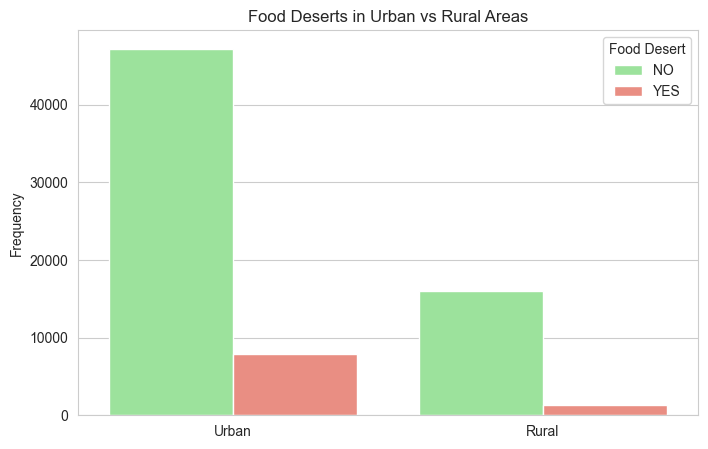

In [190]:
plt.figure(figsize=(8,5))
sns.countplot(data=FD, x='Urban_Status', hue='LowFoodAccess', 
             palette={'YES':'salmon', 'NO':'lightgreen'})
plt.title('Food Deserts in Urban vs Rural Areas')
plt.xlabel(None)
plt.ylabel('Frequency')
plt.legend(title='Food Desert')
plt.show()

###  Defining Key Questions to Answer

#### Food Access and Population Impact
Which states have the largest populations affected by low food access, and what proportion of their population is impacted? (Building on previous work)
How does low food access vary between urban and rural areas in terms of affected population and proportion?
#### Socioeconomic Factors
Is there a relationship between low food access and poverty or income inequality?
How does vehicle ownership (or lack thereof) correlate with low food access?
#### Health Outcomes
Are areas with low food access associated with worse health outcomes, such as higher obesity or diabetes rates?
Is there a link between low food access and premature death rates?
#### Geographic and Demographic Patterns
Which counties within a specific state (e.g., top-affected state) have the most severe food access issues?
Does SNAP (food assistance) participation correlate with low food access or low-income populations?
These questions will guide our analysis, helping us uncover actionable insights while demonstrating a range of data analysis techniques.

## Population-Weighted Analysis of Food Access

### Question 1: States with Largest Affected Populations and Proportions

In [16]:
# Filter low food access(LFA) tracts
LFA_tract = FD[FD["LowFoodAccess"] == "YES"]
# Total population with low food access(LFA) by state
FD["Total_Population"]
LFA_by_state = LFA_tract.groupby("State")["Total_Population"].sum()
#Total pop by state
total_pop_by_state = FD.groupby("State")["Total_Population"].sum()
# Proportion of pop with low food access(LFA)
LFA_prop = (LFA_by_state/total_pop_by_state*100).sort_values(ascending=False).round(decimals=1)

In [6]:
LFA_tract

,Tract_ID,fipscode,State,County,Urban_Status,LowFoodAccess,Total_Population,LowAccess_Pop,LowIncome_Pop,LowIncome&_LowAccess_Pop,...,NoVehicle_HHs_Ratio,SNAP_Participatio_Rate,premature_death,poor_health,low_birthweight,obesity,diabetes,unemployment,child_poverty,income_inequality
1,1001020200,1001,Alabama,Autauga County,Urban,YES,2170,1261.0,802.0,604.0,...,0.041014,0.071889,9778.1,0.2586,0.088300,0.300,0.8149,0.046,0.138,40.7
5,1001020600,1001,Alabama,Autauga County,Urban,YES,3668,3438.0,1659.0,1585.0,...,0.019357,0.061069,9778.1,0.2586,0.088300,0.300,0.8149,0.046,0.138,40.7
6,1001020700,1001,Alabama,Autauga County,Urban,YES,2891,1231.0,2175.0,742.0,...,0.011761,0.134901,9778.1,0.2586,0.088300,0.300,0.8149,0.046,0.138,40.7
10,1001021000,1001,Alabama,Autauga County,Rural,YES,2894,2338.0,977.0,902.0,...,0.003110,0.050449,9778.1,0.2586,0.088300,0.300,0.8149,0.046,0.138,40.7
11,1001021100,1001,Alabama,Autauga County,Rural,YES,3320,2640.0,1463.0,1354.0,...,0.081024,0.069277,9778.1,0.2586,0.088300,0.300,0.8149,0.046,0.138,40.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72455,56021000700,56021,Wyoming,Laramie County,Urban,YES,4338,4162.0,1772.0,2004.0,...,0.101890,0.063624,7837.0,0.1187,0.094000,0.242,0.8055,0.039,0.118,39.9
72465,56021001502,56021,Wyoming,Laramie County,Urban,YES,4899,1627.0,1857.0,601.0,...,0.032456,0.050623,7837.0,0.1187,0.094000,0.242,0.8055,0.039,0.118,39.9
72473,56025000200,56025,Wyoming,Natrona County,Urban,YES,4385,4137.0,1946.0,2078.0,...,0.074116,0.080730,8175.6,0.1301,0.072000,0.250,0.7888,0.029,0.137,42.3
72491,56027957200,56027,Wyoming,Niobrara County,Rural,YES,2484,545.0,941.0,230.0,...,0.012882,0.022142,10210.6,0.0882,0.080252,0.268,0.7826,0.038,0.164,43.3


In [17]:
LFA_by_state
total_pop_by_state
LFA_prop

State
Mississippi             29.8
New Mexico              26.6
Arkansas                24.0
Louisiana               22.3
Georgia                 22.3
Texas                   19.6
Alabama                 19.0
South Carolina          18.9
Missouri                18.1
Tennessee               17.9
Indiana                 17.5
Kansas                  17.2
North Carolina          16.7
Arizona                 16.4
Oklahoma                16.1
South Dakota            14.8
Delaware                14.5
Virginia                14.3
Minnesota               13.9
Alaska                  13.6
Florida                 13.5
West Virginia           13.5
Colorado                13.2
Kentucky                13.2
New Hampshire           13.1
Ohio                    13.0
Oregon                  12.9
Idaho                   12.5
Montana                 12.3
Washington              12.3
Michigan                11.4
Nebraska                11.0
Hawaii                  10.3
Iowa                    10.3
Illinois

In [18]:
# Combine into a single dataframe
state_summary = pd.DataFrame({
    "LFA_Population" : LFA_by_state,
    "Total_Population" : total_pop_by_state,
    "LFA_Percentage (%)": LFA_prop
}).sort_values(by="LFA_Population", ascending=False)

In [19]:
state_summary

,LFA_Population,Total_Population,LFA_Percentage (%)
State,,,
Texas,4926344,25145561,19.6
California,2669879,37253956,7.2
Florida,2546335,18801310,13.5
Georgia,2158463,9687653,22.3
North Carolina,1593822,9535483,16.7
Ohio,1504341,11536504,13.0
Illinois,1242939,12830632,9.7
Virginia,1147233,8001024,14.3
Indiana,1135595,6483802,17.5


In [22]:
print(f"Top 10 States by Low food Access Population and Proportion: \n{state_summary.head(10)}")

Top 10 States by Low food Access Population and Proportion: 
                LFA_Population  Total_Population  LFA_Percentage (%)
State                                                               
Texas                  4926344          25145561                19.6
California             2669879          37253956                 7.2
Florida                2546335          18801310                13.5
Georgia                2158463           9687653                22.3
North Carolina         1593822           9535483                16.7
Ohio                   1504341          11536504                13.0
Illinois               1242939          12830632                 9.7
Virginia               1147233           8001024                14.3
Indiana                1135595           6483802                17.5
Tennessee              1134333           6346105                17.9


Text(0.5, 1.0, 'Top 10 States by Population with Low Food Access')

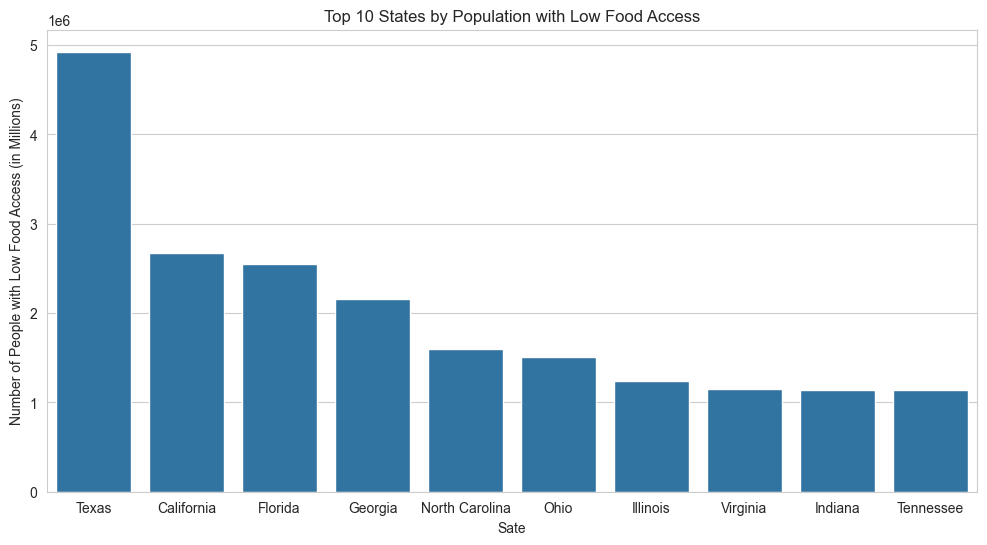

In [40]:
# Bar plot for population
top_10_states = state_summary.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, x = "State", y = "LFA_Population")
plt.xlabel("Sate")
plt.ylabel("Number of People with Low Food Access (in Millions)")
plt.title("Top 10 States by Population with Low Food Access")

Create a twin Axes sharing the xaxis.

Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right). The x-axis autoscale setting will be inherited from the original Axes. To ensure that the tick marks of both y-axes align, see ~matplotlib.ticker.LinearLocator.

In [51]:
state_summary

,LFA_Population,Total_Population,LFA_Percentage (%)
State,,,
Texas,4926344,25145561,19.6
California,2669879,37253956,7.2
Florida,2546335,18801310,13.5
Georgia,2158463,9687653,22.3
North Carolina,1593822,9535483,16.7
Ohio,1504341,11536504,13.0
Illinois,1242939,12830632,9.7
Virginia,1147233,8001024,14.3
Indiana,1135595,6483802,17.5


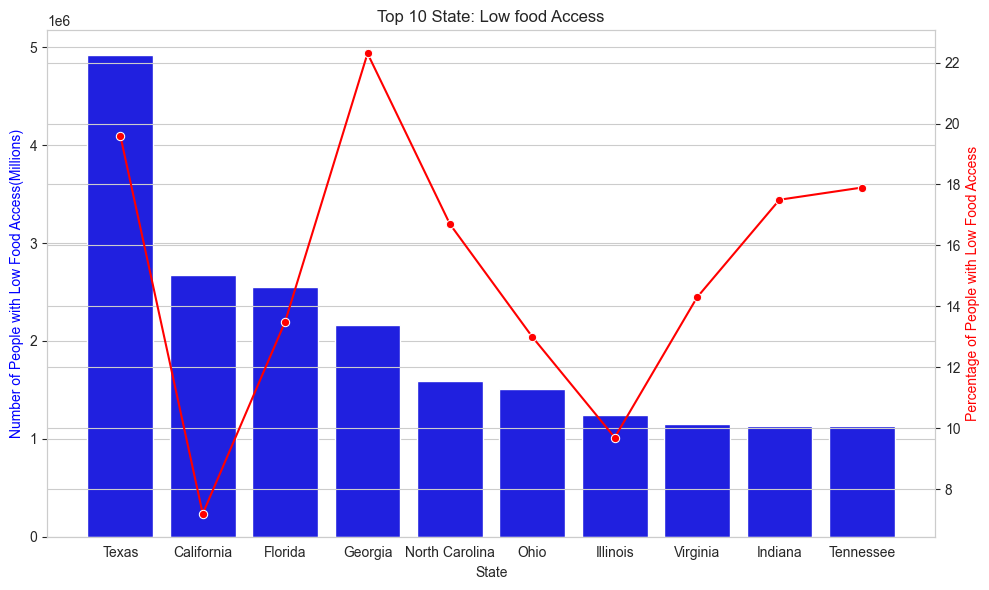

In [62]:
# Dual-axis visualization for top 10 states by population
# Create figure and primary axes
#fig, ax1 = plt.subplots() 
fig, ax1 = plt.subplots()
sns.barplot(data=top_10_states, x = "State", y = "LFA_Population", ax = ax1, color="blue")
ax1.set_ylabel("Number of People with Low Food Access(Millions)", color = "blue")
ax2 = ax1.twinx()
sns.lineplot(data=top_10_states, x = "State", y=top_10_states["LFA_Percentage (%)"], ax= ax2, color = "red",marker="o")
ax2.set_ylabel("Percentage of People with Low Food Access", color ="red")
plt.title("Top 10 State: Low food Access")
fig.tight_layout()
plt.show()


### Question 2: Urban vs. Rural Impact

Urban vs. Rural Low Food Access:
              Low_Food_Access_Pop  Proportion (%)
Urban_Status                                     
Rural                     4673301        6.584775
Urban                    34401673       14.468209


Text(0, 0.5, 'Percentage of People with Low Food Access')

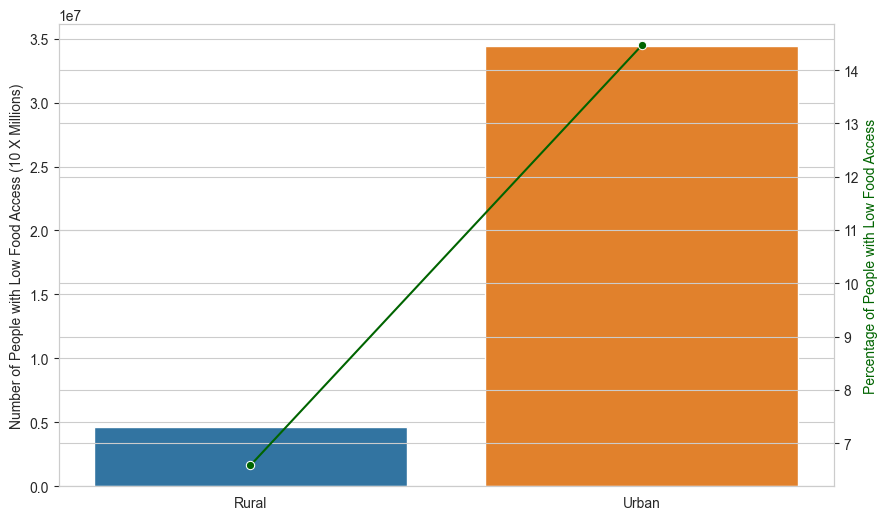

In [ ]:
#  Filter low food access(LFA) tracts
# LFA_tract = FD[FD["LowFoodAccess"] == "YES"]
# Population with low food access by urban status
# Total population with low food access(LFA) by urban status
LFA_Pop_by_UrbanStatus = LFA_tract.groupby("Urban_Status")["Total_Population"].sum()
#Total pop by Urban_Status
Total_Pop_by_UrbanStatus = FD.groupby("Urban_Status")["Total_Population"].sum()
# Proportion of pop with low food access(LFA)  based on Urban_Status
LFA_Prop_Urban = (LFA_Pop_by_UrbanStatus/Total_Pop_by_UrbanStatus*100)

# Combine into a single dataframe
urban_summary = pd.DataFrame({
    "Low_Food_Access_Pop" : LFA_Pop_by_UrbanStatus,
    'Proportion (%)': LFA_Prop_Urban
})
# Display combined results
print("Urban vs. Rural Low Food Access:")
print(urban_summary)
# Stacked bar plot with proportion annotation
fig, ax1 = plt.subplots()
sns.barplot(data=urban_summary, x = "Urban_Status", y = "Low_Food_Access_Pop", hue="Urban_Status", ax =ax1)
ax1.set_ylabel("Number of People with Low Food Access (10 X Millions)")
ax1.set(xlabel=None)
ax2=ax1.twinx()
sns.lineplot(data=urban_summary, x = "Urban_Status", y = urban_summary["Proportion (%)"], ax =ax2,color = "darkgreen", marker="o")
ax2.set_ylabel("Percentage of People with Low Food Access", color = "darkgreen")

In [68]:
LFA_Pop_by_UrbanStatus
Total_Pop_by_UrbanStatus

Urban_Status
Rural     70971304
Urban    237774234
Name: Total_Population, dtype: int64

##  Socioeconomic Analysis & Health Outcomes

### Question 3: Food Access: Probable Causes and Consequences (Correlation Analysis)

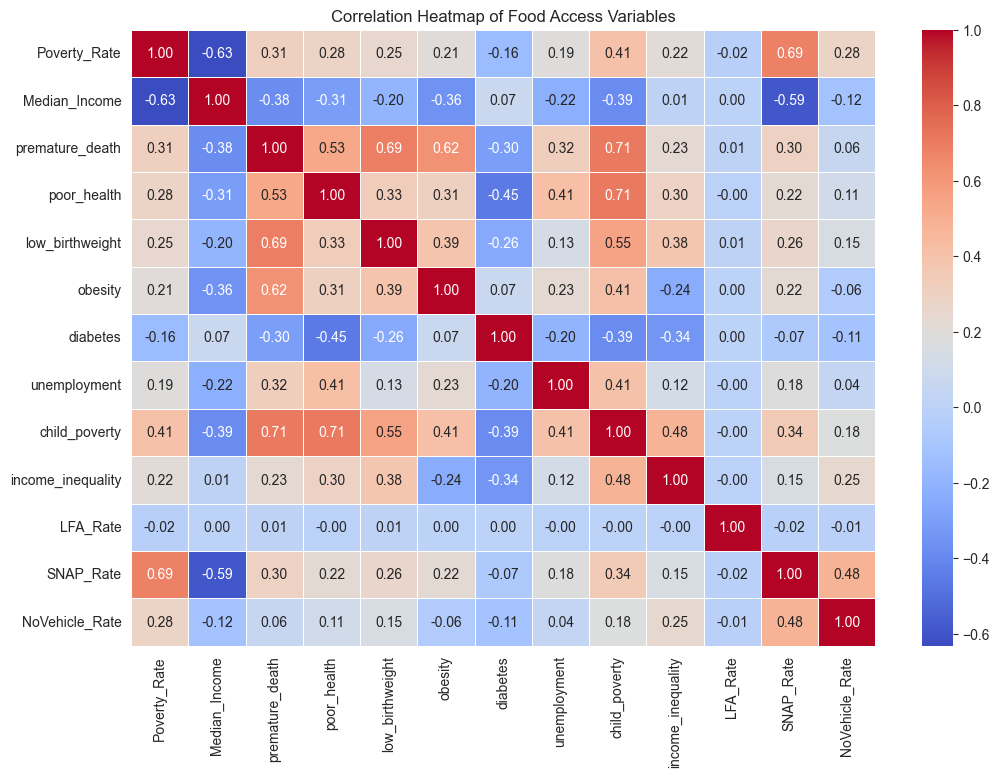

In [160]:
#Add ratios columns 
FD["LFA_Rate"] = FD["LowAccess_Pop"] / FD["Total_Population"] * 100
FD["SNAP_Rate"] = FD["SNAP_HHs"] / FD["Total_Population"] * 100
FD["NoVehicle_Rate"] = FD["NoVehicle_HHs"] / FD["Total_Population"] * 100


# Select food access (LFA_Rate), its probable causes, and consequences columns
FD.columns
numeric_cols = FD[['Poverty_Rate',
       'Median_Income', 'premature_death', 'poor_health', 'low_birthweight',
       'obesity', 'diabetes', 'unemployment', 'child_poverty',
       'income_inequality', 'LFA_Rate', 'SNAP_Rate', 'NoVehicle_Rate']]

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Food Access Variables")
plt.show()

Goal: Understand whether low food access (LFA_Rate) is linked to poverty, transportation, and health.

Method:
I used Pearson correlation to test relationships between food access and potential causes (e.g., Poverty_Rate, NoVehicle_Rate) and effects (e.g., obesity).

Findings:

LFA_Rate had very weak or no correlation with poverty, SNAP participation, vehicle access, or obesity.

The strongest relationship found was between:

SNAP_Rate and Poverty_Rate: +0.69

child_poverty and poor_health: +0.71

These reflect clear socioeconomic links, even if food access alone doesn't show up as a major player.
Even though we often assume food deserts lead directly to poor health or are caused by poverty and lack of transportation, this dataset shows that simple linear relationships are limited. Food access is a complex issue influenced by multiple overlapping factors, and correlation alone doesn’t capture the full story.

### Health Outcomes

#### Linking Childhood Poverty to Adult Health: Urban and Rural Perspectives

The scatter plot explores the relationship between two variables:
Proportion of Adults in Poor Health (x-axis) : This represents the percentage of adults in a given area or population who are in poor health.
Proportion of Children in Poverty (y-axis) : This represents the percentage of children in the same area or population who are living in poverty.

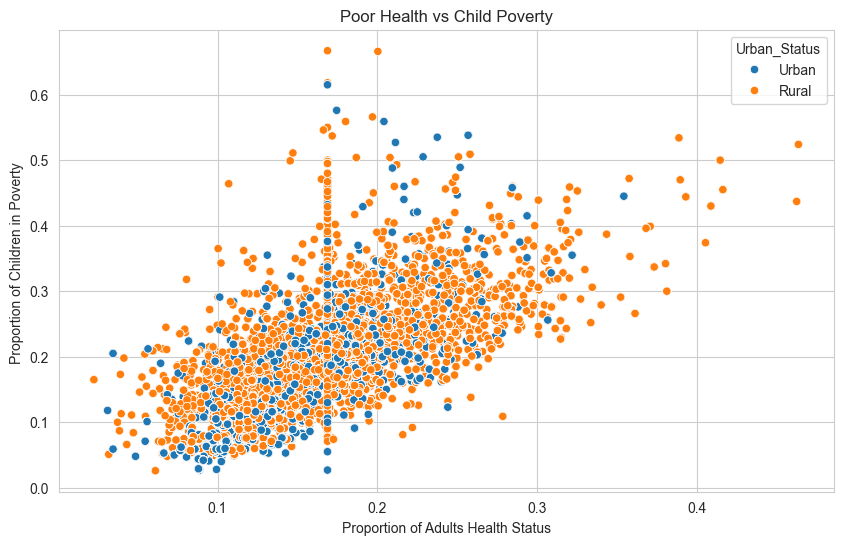

In [162]:
# Poor Health vs Child Poverty
sns.scatterplot(data=FD, x="poor_health", y="child_poverty", hue="Urban_Status")
plt.title("Poor Health vs Child Poverty")
plt.xlabel("Proportion of Adults Health Status")
plt.ylabel("Proportion of Children in Poverty ")
plt.show()

#### Question 4: Low Food Access VS. Obesity and Diabetes

Health Metrics by Food Access:
                obesity  diabetes
LowFoodAccess                    
NO             0.257326  0.796038
YES            0.276815  0.791431


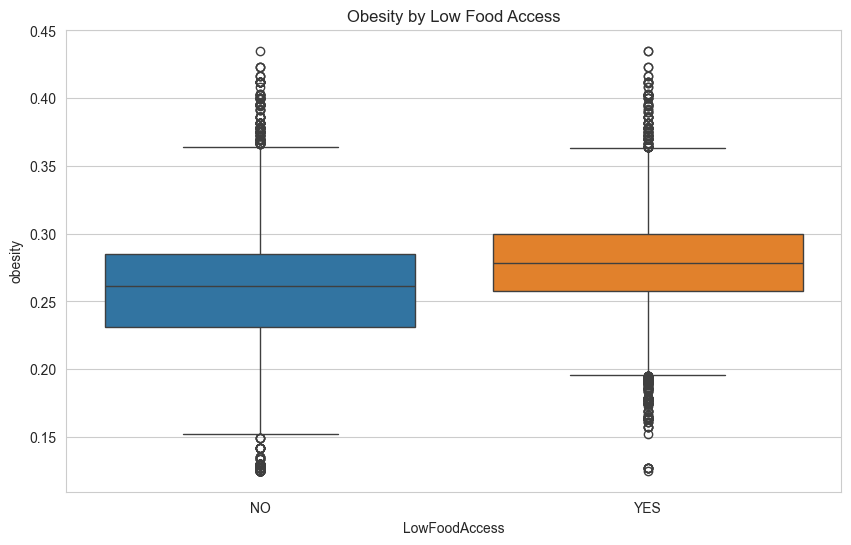

In [134]:
# Average health metrics
health_comp = FD.groupby('LowFoodAccess')[['obesity', 'diabetes']].mean()
print("Health Metrics by Food Access:")
print(health_comp)

# Boxplot for obesity
sns.boxplot(data=FD, x='LowFoodAccess', y='obesity', hue="LowFoodAccess")
plt.title('Obesity by Low Food Access')
plt.show()

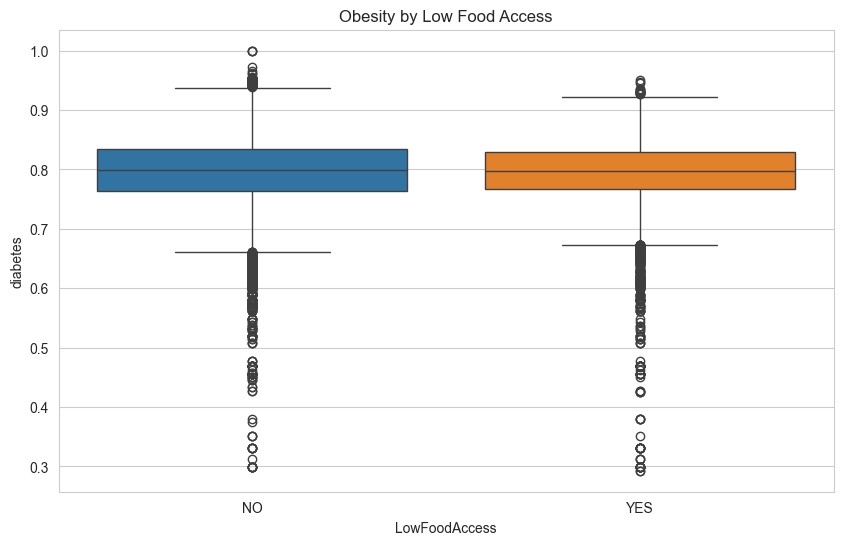

In [163]:
# Boxplot for obesity
sns.boxplot(data=FD, x='LowFoodAccess', y='diabetes', hue="LowFoodAccess")
plt.title('Obesity by Low Food Access')
plt.show()

## Geographic Drill-Down
### Question 5: County-Level View in Most Affected State

In [161]:
# Get top state and filter data
top_state = state_summary.index[0]
state_data = low_access_tracts[low_access_tracts['State'] == top_state]
county_data = state_data.groupby('County')['Total_Population'].sum().sort_values(ascending=False).head(10)

print(f"Top 10 Counties in {top_state}:")
print(county_data)

Top 10 Counties in Texas:
County
Harris County      637644
Hidalgo County     461260
Dallas County      441656
Tarrant County     315695
Bexar County       315428
El Paso County     205339
Cameron County     184305
Travis County      135025
Bell County         82490
McLennan County     68357
Name: Total_Population, dtype: int64


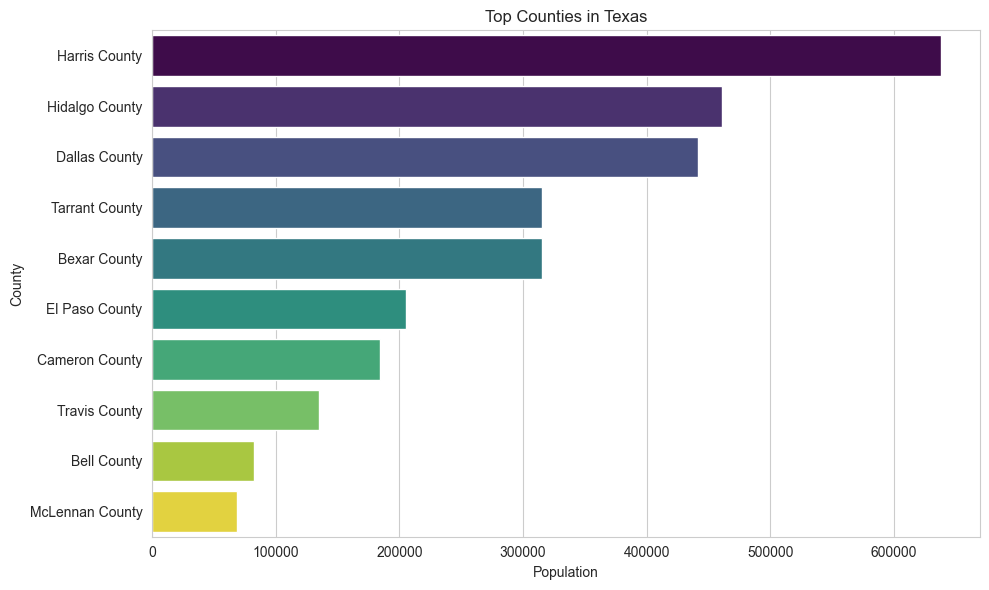

In [ ]:
# Generate gradient colors
n_bars = len(county_data)
colors = plt.cm.viridis(np.linspace(0, 1, n_bars)).tolist()  # Convert to list

# Create the plot with correct parameters
ax = sns.barplot(
    x=county_data.values,
    y=county_data.index,
    hue=county_data.index,  # Required now
    palette=colors
)

plt.title(f"Top Counties in {top_state}")
plt.xlabel("Population")
plt.tight_layout()
plt.show()

## poor_health VS child_poverty

poor_health: Proportion of adults who report being in fair or poor general health, expressed as a value between 0 and 1 (i.e., 0 = no one reports poor health, 1 = everyone reports poor health). 
child_poverty: Proportion of children under age 18 living in households below the federal poverty threshold, expressed as a value between 0 and 1. 

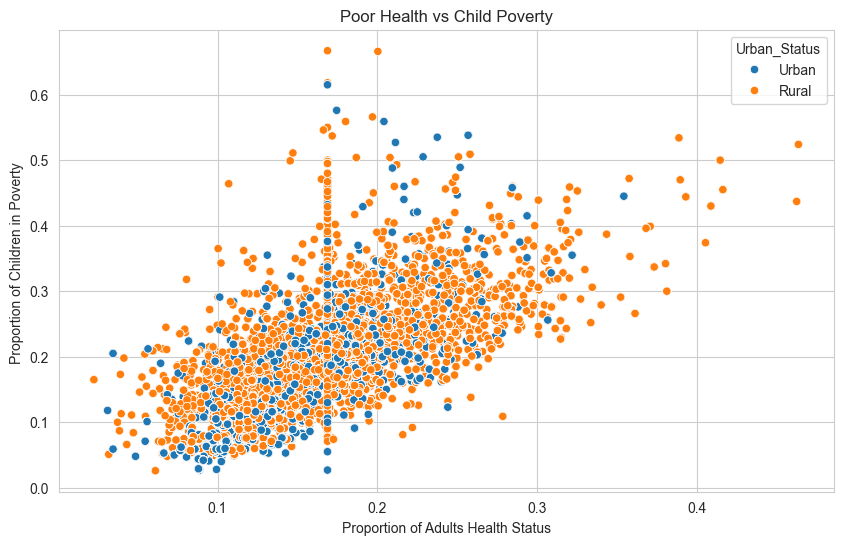

In [ ]:
# Poor Health vs Child Poverty
sns.scatterplot(data=FD, x="poor_health", y="child_poverty", hue="Urban_Status")
plt.title("Poor Health vs Child Poverty")
plt.xlabel("Proportion of Adults Health Status")
plt.ylabel("Proportion of Children in Poverty ")
plt.show()

There is a positive correlation between poor health and child poverty, with urban areas showing more variability and rural areas having distinct patterns.